In [1]:
from Collabrative_Filtering import collabrative_filtering
from helper import write_submission, csv_parse, submit_results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alpha = 0.05
beta = 0.02
epsilon = 1e-3
max_iter = 5000
sample = 120

training_dataset = pd.read_csv('./data/data_train_post.csv')
cf = collabrative_filtering(training_dataset, k=200)
final_pred, traces = cf.train(alpha, beta, max_iter, epsilon, sample)

Initial Loss: 0.84854
************************************************************
Iteration: 100, Misfit: 0.76452, Sample: 120
Average time per iteration: 0.4529
************************************************************
Iteration: 200, Misfit: 0.75795, Sample: 120
Average time per iteration: 0.5019
************************************************************
Iteration: 300, Misfit: 0.75194, Sample: 120
Average time per iteration: 0.4715
************************************************************
Iteration: 400, Misfit: 0.74723, Sample: 120
Average time per iteration: 0.4566
************************************************************
Iteration: 500, Misfit: 0.74432, Sample: 120
Average time per iteration: 0.4628
************************************************************
Iteration: 600, Misfit: 0.74295, Sample: 120
Average time per iteration: 0.4612
************************************************************
Iteration: 700, Misfit: 0.73904, Sample: 120
Average time per iteration

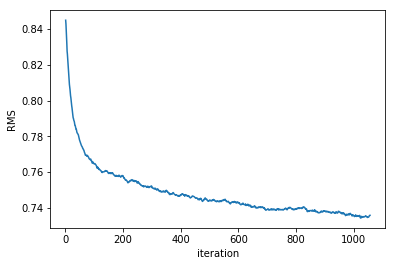

Total number of entries in the submission file: 1176952


In [3]:
plt.plot(traces[:, 0], traces[:,1])
plt.xlabel('iteration')
plt.ylabel('RMS')
plt.show()

write_submission(final_pred)

In [4]:
# ## Submit the result 
# submit_results()

Only 5 submission a day. Are you sure about this submission?(y/n)y
Submission Succeed!
